## Breast Cancer Detection

#### Classification of Breast Cancer Cell as melignant(4) or benign(2)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.mixture import GaussianMixture as GMM

In [19]:
print("numpy - {}".format(np.version.version))
print("pandas - {}".format(pd.__version__))
print('matplotlib - {}'.format(matplotlib.__version__))
print('sklearn - {}'.format(sklearn.__version__))

numpy - 1.16.5
pandas - 0.25.1
matplotlib - 3.1.1
sklearn - 0.21.3


In [20]:
# Load Dataset of breast cancer from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)
# This dataset has missing values in bare_nuclei column
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [21]:
#preprocessing the data
#replacing the missing values in bare_nuclei column by mean
bn_array = np.array(df[df["bare_nuclei"]!='?']["bare_nuclei"])
bn_array=[int(x) for x in bn_array]
bn_array = np.array(bn_array)
meanval = bn_array.mean()
df["bare_nuclei"].replace('?',str(meanval), inplace=True)

In [22]:
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

In [23]:
print(df.axes)
print(df.shape)

#dropping the id column because it will be of no use in training ML model
df.drop(['id'], 1, inplace = True)

print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)
(699, 10)


In [24]:
print(df.iloc[698])

#Knowing more about each feature of data
print(df.describe())

clump_thickness            4.0
uniform_cell_size          8.0
uniform_cell_shape         8.0
marginal_adhesion          5.0
single_epithelial_size     4.0
bare_nuclei                5.0
bland_chromatin           10.0
normal_nucleoli            4.0
mitoses                    1.0
class                      4.0
Name: 698, dtype: float64
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bare_nuclei  \
count        

In [25]:
#I have observed that min of every feature is 1 and maximum is 10. Also mean is very less for all features
#mean of class is less than 3 it means we have more benign cases than malignant

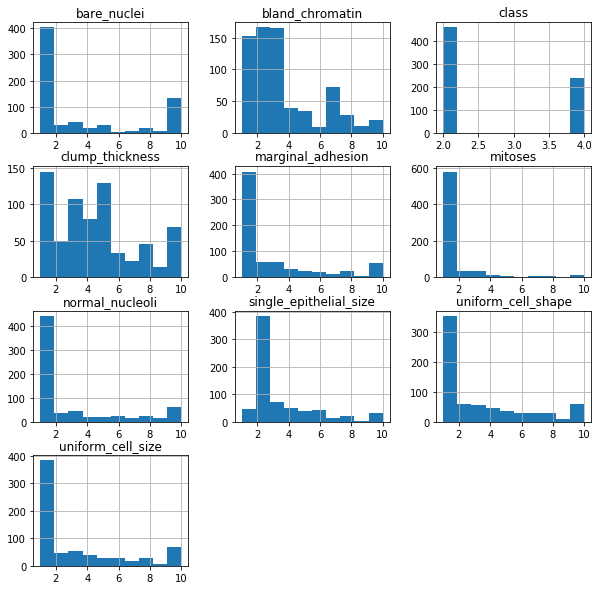

In [26]:
#plotting histograms for each variable to know more about features
df.hist(figsize=(10, 10))
plt.show()

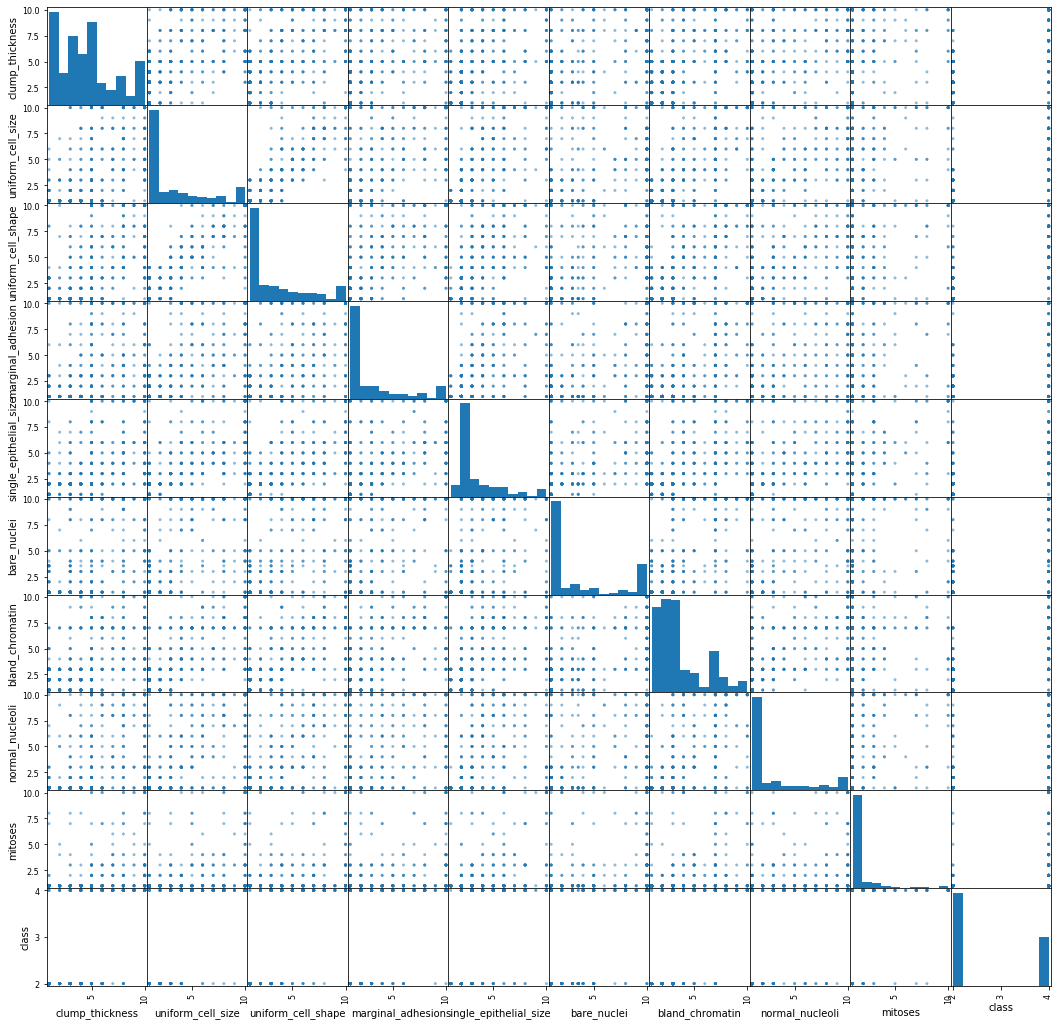

In [27]:
#creating scatter plot matrix to find if there exist any linear relation between features
scatter_matrix(df, figsize=(18, 18))
plt.show()

In [28]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.587300,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686801,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.709606,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.665049,0.666715,0.603352,0.417633,0.696800
single_epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.581261,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.587300,0.686801,0.709606,0.665049,0.581261,1.000000,0.675896,0.577362,0.338740,0.816050
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.675896,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.577362,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.338740,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.816050,0.756616,0.712244,0.423170,1.000000


In [29]:
df.drop(['uniform_cell_shape'], 1, inplace = True)

In [30]:
# from above scatter plot I have observed that there does not exist any strong linear relation between features moreover I can
# observe from last row of figure that malignant cell takes almost every value of all parameters therfore we can not decide 
# straightforward whether a cell is malignant or benign

In [31]:
df

,clump_thickness,uniform_cell_size,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,2,1.0,3,1,1,2
1,5,4,5,7,10.0,3,2,1,2
2,3,1,1,2,2.0,3,1,1,2
3,6,8,1,3,4.0,3,7,1,2
4,4,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2.0,1,1,1,2
695,2,1,1,2,1.0,1,1,1,2
696,5,10,3,7,3.0,8,10,2,4
697,4,8,4,3,4.0,10,6,1,4


In [32]:
#create X and Y dataset for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [33]:
X

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  5., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10.,  3., ...,  8., 10.,  2.],
       [ 4.,  8.,  4., ..., 10.,  6.,  1.],
       [ 4.,  8.,  5., ..., 10.,  4.,  1.]])

In [34]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [35]:
X

array([[ 0.20693572, -0.69999505, -0.63324716, ..., -0.17966213,
        -0.61182504, -0.34391178],
       [ 0.20693572,  0.28384518,  0.76862067, ..., -0.17966213,
        -0.28411186, -0.34391178],
       [-0.50386559, -0.69999505, -0.63324716, ..., -0.17966213,
        -0.61182504, -0.34391178],
       ...,
       [ 0.20693572,  2.25152563,  0.06768675, ...,  1.87236122,
         2.33759359,  0.23956962],
       [-0.14846494,  1.59563215,  0.41815371, ...,  2.69317056,
         1.02674087, -0.34391178],
       [-0.14846494,  1.59563215,  0.76862067, ...,  2.69317056,
         0.37131451, -0.34391178]])

In [36]:
# Internal cluster validation

In [37]:
#for N>2

In [38]:
gm_bic= []
gm_aic=[]
gm_sil=[]
gm_db=[]
gm_ch=[]
for i in range(1,30):
    gm = GMM(n_components=i,n_init=10,max_iter=1000)
    labels_gm = gm.fit_predict(X)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X)))
    print("AIC for number of cluster(s) {}: {}".format(i,gm.aic(X)))
    gm_bic.append(gm.bic(X))    
    gm_aic.append(gm.aic(X))
    if(i>1):
        print("Silihouette score for number of cluster(s) {}: {}".format(i,silhouette_score(X,labels_gm)))
        print("CH score for number of cluster(s) {}: {}".format(i,metrics.calinski_harabasz_score(X, labels_gm)))
        print("DB score for number of cluster(s) {}: {}".format(i,davies_bouldin_score(X, labels_gm)))
        print("-"*100)
        gm_sil.append(silhouette_score(X, labels_gm))
        gm_db.append(davies_bouldin_score(X, labels_gm))
        gm_ch.append(metrics.calinski_harabasz_score(X, labels_gm))

BIC for number of cluster(s) 1: 12573.789617518081
AIC for number of cluster(s) 1: 12373.604984859794
BIC for number of cluster(s) 2: 2355.94465250768
AIC for number of cluster(s) 2: 1951.025736448871
Silihouette score for number of cluster(s) 2: 0.4797890734426355
CH score for number of cluster(s) 2: 573.2982765801918
DB score for number of cluster(s) 2: 0.9589239951187565
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -4283.940608195843
AIC for number of cluster(s) 3: -4893.593807655174
Silihouette score for number of cluster(s) 3: 0.1701482641522102
CH score for number of cluster(s) 3: 351.8297502288275
DB score for number of cluster(s) 3: 2.0427842203204207
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -6700.613914741129
AIC for number of cluster(s) 4: -7515.00139760098
Silihouette score for number of cluster(s)

BIC for number of cluster(s) 24: -11289.988162767066
AIC for number of cluster(s) 24: -16199.061313637347
Silihouette score for number of cluster(s) 24: 0.04823300780744085
CH score for number of cluster(s) 24: 88.67061613210382
DB score for number of cluster(s) 24: 1.9017848834825777
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 25: -12051.403425276927
AIC for number of cluster(s) 25: -17165.21085954773
Silihouette score for number of cluster(s) 25: -0.01235183501199491
CH score for number of cluster(s) 25: 82.27442044321185
DB score for number of cluster(s) 25: 2.1036745453292083
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 26: -10593.156939817112
AIC for number of cluster(s) 26: -15911.698657488436
Silihouette score for number of cluster(s) 26: 0.03798930537295559
CH score for number of cluster(s) 26: 82.202654646604

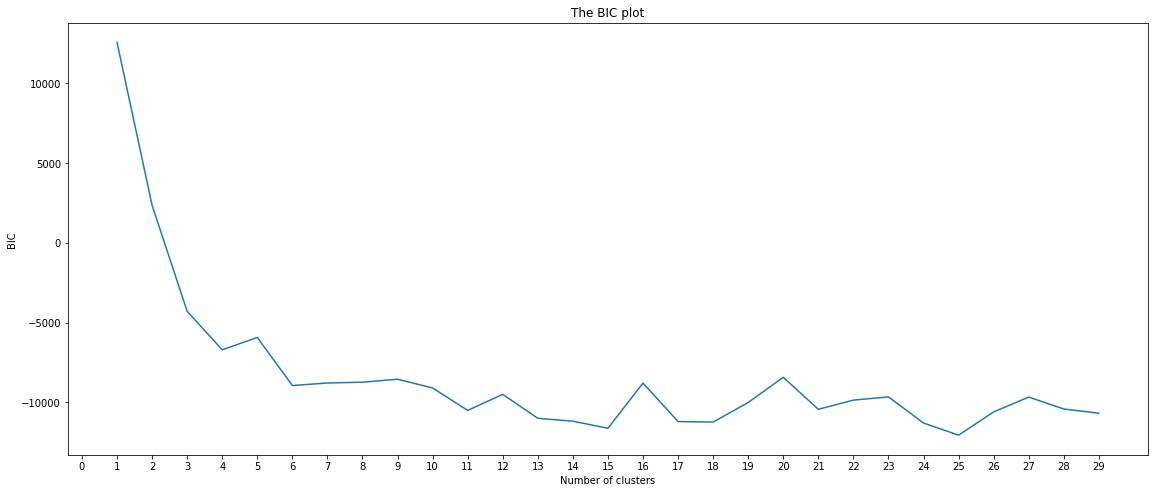

In [39]:
fig = plt.figure(figsize=(15,6))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(1, 30), gm_bic)
plt.xticks(range(0, 30, 1))
axis1.set_title("The BIC plot")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel("BIC")
plt.show()

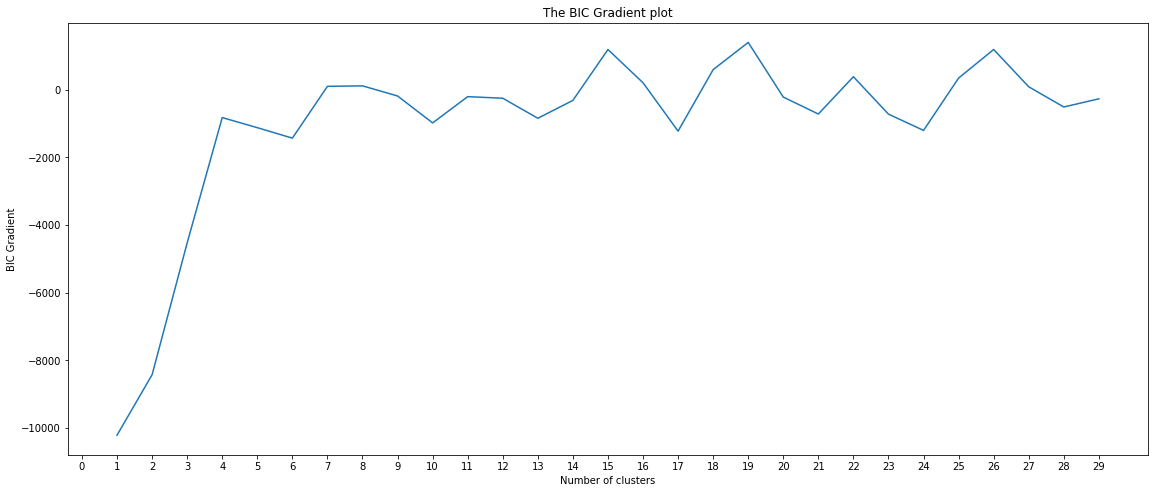

In [40]:
gm_bic_grad = np.gradient(gm_bic)
fig = plt.figure(figsize=(15,6))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(1, 30), gm_bic_grad)
plt.xticks(range(0, 30, 1))
axis1.set_title("The BIC Gradient plot")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel("BIC Gradient")
plt.show()

In [52]:
# from above curve optimum number of clusters is 2

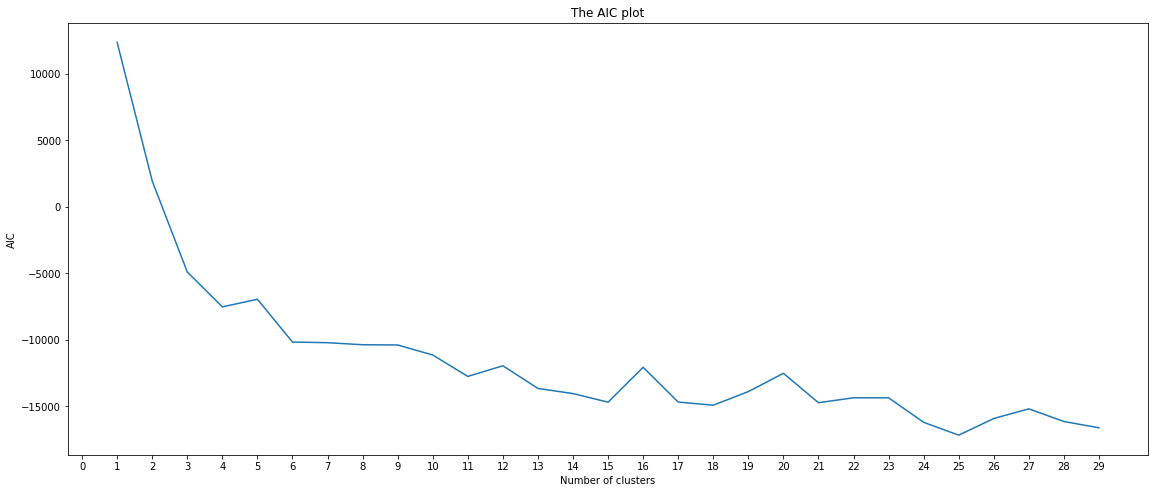

In [50]:
fig = plt.figure(figsize=(15,6))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(1, 30), gm_aic)
plt.xticks(range(0, 30, 1))
axis1.set_title("The AIC plot")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel("AIC")
plt.show()

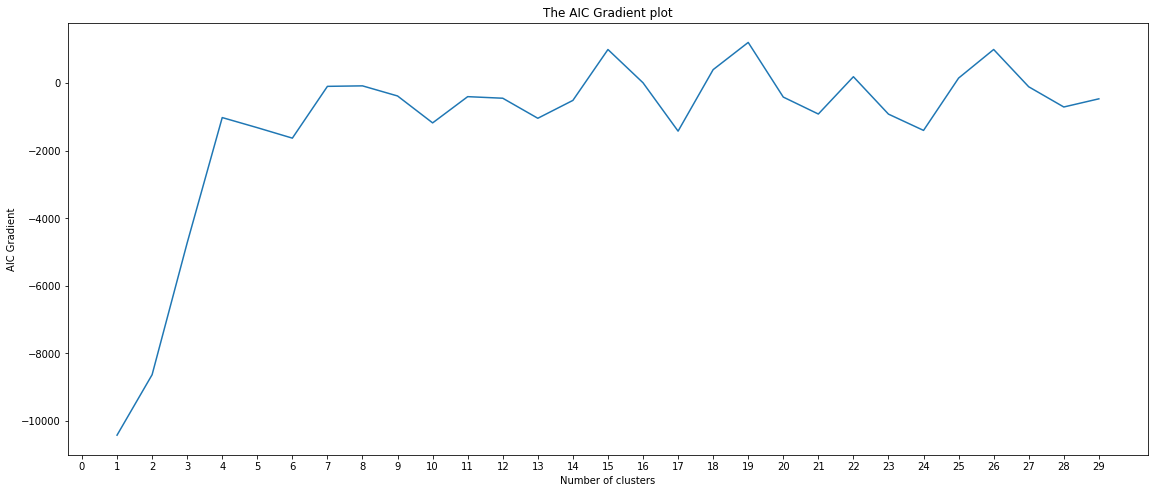

In [46]:
gm_aic_grad = np.gradient(gm_aic)
fig = plt.figure(figsize=(15,6))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(1, 30), gm_aic_grad)
plt.xticks(range(0, 30, 1))
axis1.set_title("The AIC Gradient plot")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel("AIC Gradient")
plt.show()

In [51]:
# from above curve optimum number of clusters is 2

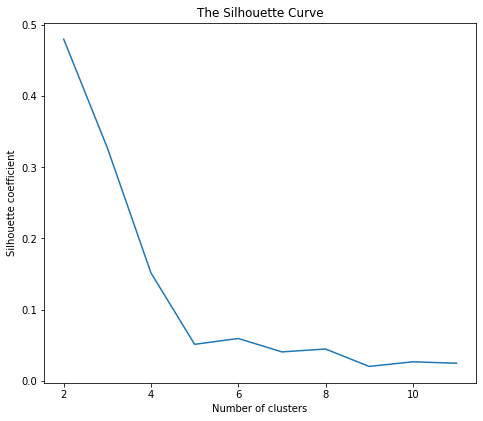

In [138]:
fig = plt.figure(figsize=(6,5))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(2, 12), gm_sil[:10])
plt.xticks(range(2, 12, 2))
axis1.set_title("The Silhouette Curve")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel('Silhouette coefficient')
plt.show()

In [81]:
# from above Silhouette Score optimum number of clusters is 2

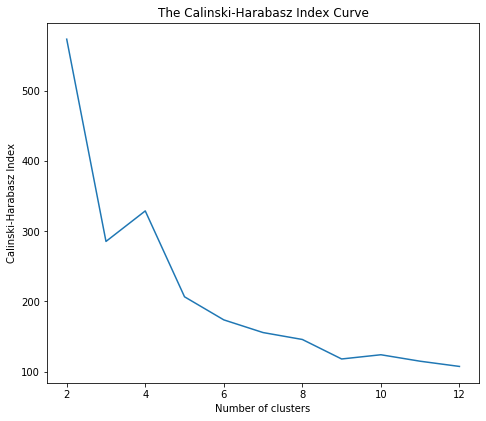

In [150]:
fig = plt.figure(figsize=(6,5))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(2, 13), gm_ch[:11])
plt.xticks(range(2, 14, 2))
axis1.set_title("The Calinski-Harabasz Index Curve")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel('Calinski-Harabasz Index')
plt.show()

In [83]:
#from the above Calinski-Harabasz index (CHI) matric we got optimum number of clusters as 2 

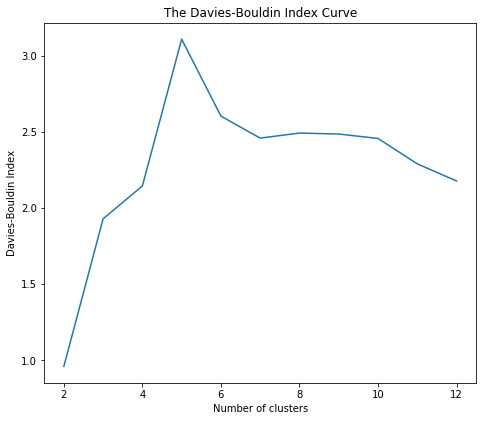

In [146]:
fig = plt.figure(figsize=(6,5))
axis1 = fig.add_axes(([0,0,1,1]))
axis1.plot(range(2, 13), gm_db[:11])
plt.xticks(range(2, 14, 2))
axis1.set_title("The Davies-Bouldin Index Curve")
axis1.set_xlabel("Number of clusters")
axis1.set_ylabel('Davies-Bouldin Index')
plt.show()

In [85]:
#from above The Davies–Bouldin index (DBI) matric we got optimum number of clusters as 2

In [86]:
# External cluster validation

In [87]:
#Applying GMM
from sklearn.mixture import GaussianMixture as GMM
gmm_model = GMM(n_components=2, max_iter=1000, n_init=10)
gmmLabels = gmm_model.fit_predict(X)

In [88]:
gmmLabels

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [89]:
def infer_cluster_label(labels, actual_labels):
    '''
    Associates most probable label with each cluster in GMM model
    returns: dictionary of clusters assigned to each label
    
    '''
    inferred_labels = {}
    for i in range(2):
        #find the index of points in cluster
        labls=[]
        index = np.where(labels==i)
        #append actual label for each point in cluster
        labls.append(actual_labels[index])
        #determine most common label
        counts = np.bincount(np.squeeze(labls).astype(np.uint8))
        #assign the cluster to a value in the inferred label dictionary
        if np.argmax(counts) in inferred_labels:
            #append the new number to the existing array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]
        print(labls)
        print('Cluster: {}, label:{}'.format(i, np.argmax(counts)))
    return inferred_labels

In [90]:
def infer_data_labels(X_labels, cluster_labels):
    '''
    Determines label for each array, depending on the cluster it has been assigned to
    returns: predicted labels for each array
    '''
    #empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, val in cluster_labels.items():
            if cluster in val:
                predicted_labels[i]=key;
                
    return predicted_labels
    

In [106]:
#test the infer_cluster_labels() and infer_data_labels() function
gmm_cluster_labels = infer_cluster_label(gmmLabels, y)
gmm_predicted_labels = infer_data_labels(gmmLabels, gmm_cluster_labels)

In [92]:
#specifing testing options
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
scoring = 'accuracy'

In [151]:
print("accuracy ")
print(accuracy_score(y, gmm_predicted_labels))
print(classification_report(y, gmm_predicted_labels))

accuracy 
0.9256080114449213
              precision    recall  f1-score   support

           2       1.00      0.89      0.94       458
           4       0.82      1.00      0.90       241

    accuracy                           0.93       699
   macro avg       0.91      0.94      0.92       699
weighted avg       0.94      0.93      0.93       699



In [94]:
# Adjusted Rand index

In [95]:
from sklearn import metrics
metrics.adjusted_rand_score(y, gmmLabels)

0.7235238012982509

In [96]:
# from above we can see our adjusted Rand index score is good (Perfect labeling is scored 1.0)

In [97]:
metrics.normalized_mutual_info_score(y, gmmLabels, average_method='arithmetic')

0.6769101244558279

In [51]:
# from above we can see our Normalized Mutual Information (NMI) score is good (Perfect labeling is scored 1.0)

In [98]:
from sklearn import metrics
print(metrics.homogeneity_score(y, gmmLabels))
print(metrics.completeness_score(y, gmmLabels))
print(metrics.v_measure_score(y, gmmLabels))

0.6957564343841053
0.6590578868306297
0.6769101244558279


In [99]:
# from above we can see our Homogeneity score, completeness score and V-measure score are good (Perfect labeling is scored 1.0)

In [100]:
metrics.fowlkes_mallows_score(y, gmmLabels)

0.870361666211552

In [101]:
# from above The Fowlkes-Mallows index is good 
# The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall
# A high value indicates a good score (maximum value is 1)

In [102]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y, gmmLabels)

array([[ 52, 406],
       [241,   0]])

In [120]:
# From above we can conclude there are 458 samples whose true cluster is 2 Of them, 52 are in predicted cluster 0 and 406 are in
# predicted cluster 1

# we can also conclude that there are 241 samples whose true cluster is 4 Of them, 241 are in predicted cluster 0 and 0 are in
# predicted cluster 1